In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer

## Read Data From File

In [16]:
data = pd.read_csv('../data/training_data.csv', index_col=0)
data.fillna(0, inplace=True)

In [17]:
data.head()

,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,1,79,1970379,0,0,0,0,2566242,928419,0,...,0,0,0,0,7758,17442,0,0,0,240167
defunkt,2,1,4609687,0,0,0,0,0,470103,0,...,0,0,0,0,6399,23938,0,0,0,896415
wycats,4,358,3378185,0,0,0,0,2687760,952,0,...,0,0,0,0,21641,441513,0,0,0,3060
brynary,19,3481,11661,0,0,0,0,0,951748,0,...,0,0,0,0,0,17954,0,0,0,3142
kevinclark,20,18,0,0,0,0,0,0,43311,4285,...,0,0,0,0,0,0,0,0,0,8688


In [18]:
data.describe()

,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
count,550.000000,550.000000,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,5.500000e+02,...,5.500000e+02,5.500000e+02,5.500000e+02,550.000000,5.500000e+02,5.500000e+02,550.000000,550.000000,5.500000e+02,5.500000e+02
mean,995.587273,796.436364,5.409602e+05,3.577529e+05,2.079493e+05,1.280013e+06,2.421716e+04,6.027379e+05,8.310693e+05,3.421887e+05,...,8.855465e+03,1.350736e+04,2.620575e+04,81.798182,3.285230e+04,6.345624e+05,22.530909,8.872727,7.136024e+04,8.393354e+05
std,620.811352,1243.779349,3.027974e+06,2.294670e+06,2.655198e+06,2.951338e+07,4.574708e+05,8.161754e+06,9.009276e+06,3.401899e+06,...,1.748489e+05,2.833972e+05,4.385811e+05,1044.655914,2.372345e+05,8.614123e+06,382.004828,208.083899,1.673546e+06,7.485050e+06
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,443.250000,36.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,7.630000e+02
50%,985.500000,362.000000,3.536500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.310000e+02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.130000e+03,0.000000,0.000000,0.000000e+00,1.611350e+04
75%,1513.500000,1102.250000,6.119475e+04,5.657000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.406550e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,7.571750e+03,1.898125e+04,0.000000,0.000000,0.000000e+00,1.858868e+05
max,2111.000000,12981.000000,5.295688e+07,3.382137e+07,5.736970e+07,6.921549e+08,1.068952e+07,1.851307e+08,1.860555e+08,5.173766e+07,...,4.082184e+06,6.640060e+06,9.814544e+06,18223.000000,4.753033e+06,1.857201e+08,7540.000000,4880.000000,3.924813e+07,1.647797e+08


In [19]:
data.mean()

Id               9.955873e+02
Contributions    7.964364e+02
JavaScript       5.409602e+05
Python           3.577529e+05
Java             2.079493e+05
C#               1.280013e+06
PHP              2.421716e+04
TypeScript       6.027379e+05
Ruby             8.310693e+05
C++              3.421887e+05
C                2.583425e+06
Swift            4.685277e+04
Go               4.452715e+05
Shell            5.087399e+04
Kotlin           3.155875e+03
Rust             2.039522e+05
PowerShell       2.003151e+03
Objective-C      1.194804e+04
R                1.766418e+02
MATLAB           3.296364e+00
Dart             8.855465e+03
Vue              1.350736e+04
Assembly         2.620575e+04
Sass             8.179818e+01
CSS              3.285230e+04
HTML             6.345624e+05
Pascal           2.253091e+01
Racket           8.872727e+00
Zig              7.136024e+04
Other            8.393354e+05
dtype: float64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, mojombo to misto
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             550 non-null    int64
 1   Contributions  550 non-null    int64
 2   JavaScript     550 non-null    int64
 3   Python         550 non-null    int64
 4   Java           550 non-null    int64
 5   C#             550 non-null    int64
 6   PHP            550 non-null    int64
 7   TypeScript     550 non-null    int64
 8   Ruby           550 non-null    int64
 9   C++            550 non-null    int64
 10  C              550 non-null    int64
 11  Swift          550 non-null    int64
 12  Go             550 non-null    int64
 13  Shell          550 non-null    int64
 14  Kotlin         550 non-null    int64
 15  Rust           550 non-null    int64
 16  PowerShell     550 non-null    int64
 17  Objective-C    550 non-null    int64
 18  R              550 non-null    int64
 19  MATLA

## Transform Data

#### 1. Make the bytes into percentages

In [21]:
col = ["Id", "Contributions", "JavaScript", "Python", "Java", "C#", "PHP", "TypeScript", "Ruby", "C++", "C", "Swift", "Go", "Shell", "Kotlin", "Rust", "PowerShell", "Objective-C", "R", "MATLAB", "Dart", "Vue", "Assembly", "Sass", "CSS", "HTML", "Pascal", "Racket", "Zig", "Other"]
tcols = [x + '-T' for x in col]
def turn_to_percent(X, columns):
    X[columns] = X[columns].div(X[columns].sum(axis=1), axis=0)
    return X

# Create a FunctionTransformer using the defined function and pass the subset_columns argument
transformer = FunctionTransformer(turn_to_percent, validate=False, kw_args={'columns': col[2:]})

# Apply the transformation to your dataset
data = transformer.transform(data)
data

,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,1,79,0.343363,0.000000,0.00000,0.0,0.0,0.447199,0.161788,0.000000,...,0.0,0.000000,0.0,0.0,0.001352,0.003039,0.0,0.0,0.0,0.041852
defunkt,2,1,0.718800,0.000000,0.00000,0.0,0.0,0.000000,0.073304,0.000000,...,0.0,0.000000,0.0,0.0,0.000998,0.003733,0.0,0.0,0.0,0.139780
wycats,4,358,0.516904,0.000000,0.00000,0.0,0.0,0.411260,0.000146,0.000000,...,0.0,0.000000,0.0,0.0,0.003311,0.067557,0.0,0.0,0.0,0.000468
brynary,19,3481,0.011735,0.000000,0.00000,0.0,0.0,0.000000,0.957798,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.018068,0.0,0.0,0.0,0.003162
kevinclark,20,18,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.227816,0.022539,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.045699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
matthutchinson,2095,1508,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.333557,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.469403
ericstewart,2101,0,0.000563,0.000000,0.00000,0.0,0.0,0.000000,0.016099,0.000000,...,0.0,0.000000,0.0,0.0,0.010980,0.004528,0.0,0.0,0.0,0.472616
Wobin,2107,33,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000


#### 2. Standardize the data using a StandardScaler

In [22]:
scaler = StandardScaler()

data[tcols] = scaler.fit_transform(data[col])
data.head()

,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Dart-T,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,1,79,0.343363,0.0,0.0,0.0,0.0,0.447199,0.161788,0.000000,...,-0.081177,-0.102274,-0.070329,-0.08203,-0.257595,-0.317586,-0.043711,-0.042679,-0.042679,-0.534307
defunkt,2,1,0.718800,0.0,0.0,0.0,0.0,0.000000,0.073304,0.000000,...,-0.081177,-0.102274,-0.070329,-0.08203,-0.263117,-0.313043,-0.043711,-0.042679,-0.042679,-0.225316
wycats,4,358,0.516904,0.0,0.0,0.0,0.0,0.411260,0.000146,0.000000,...,-0.081177,-0.102274,-0.070329,-0.08203,-0.227041,0.105194,-0.043711,-0.042679,-0.042679,-0.664884
brynary,19,3481,0.011735,0.0,0.0,0.0,0.0,0.000000,0.957798,0.000000,...,-0.081177,-0.102274,-0.070329,-0.08203,-0.278676,-0.219104,-0.043711,-0.042679,-0.042679,-0.656384
kevinclark,20,18,0.000000,0.0,0.0,0.0,0.0,0.000000,0.227816,0.022539,...,-0.081177,-0.102274,-0.070329,-0.08203,-0.278676,-0.337504,-0.043711,-0.042679,-0.042679,-0.522169


#### 3. Determine Number of Clusters

In [23]:
def optimize_kmeans(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    
    # generate elbow
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k), inertia)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Elbow Method')
    plt.show()

d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

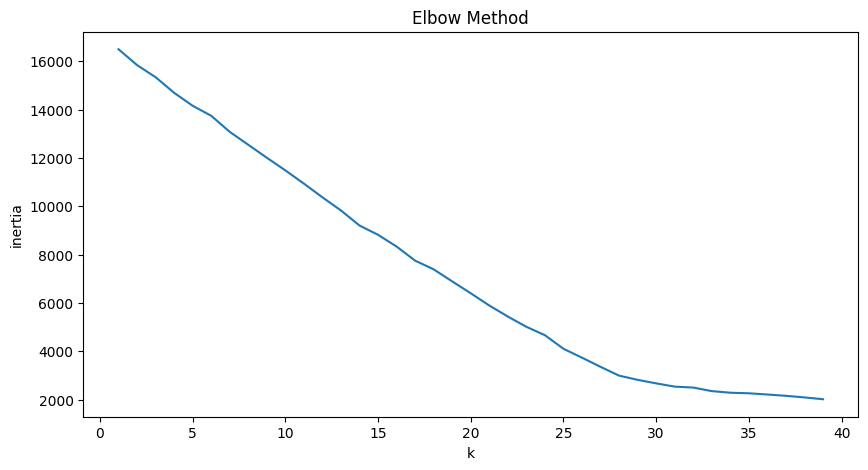

In [24]:
optimize_kmeans(data[tcols], 40)

#### 4 Apply K-Means Clustering

In [25]:
kmeans = KMeans(n_clusters=25, random_state=0).fit(data[tcols])
data['cluster'] = kmeans.labels_
data.head()

d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T,cluster
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,1,79,0.343363,0.0,0.0,0.0,0.0,0.447199,0.161788,0.000000,...,-0.102274,-0.070329,-0.08203,-0.257595,-0.317586,-0.043711,-0.042679,-0.042679,-0.534307,8
defunkt,2,1,0.718800,0.0,0.0,0.0,0.0,0.000000,0.073304,0.000000,...,-0.102274,-0.070329,-0.08203,-0.263117,-0.313043,-0.043711,-0.042679,-0.042679,-0.225316,5
wycats,4,358,0.516904,0.0,0.0,0.0,0.0,0.411260,0.000146,0.000000,...,-0.102274,-0.070329,-0.08203,-0.227041,0.105194,-0.043711,-0.042679,-0.042679,-0.664884,5
brynary,19,3481,0.011735,0.0,0.0,0.0,0.0,0.000000,0.957798,0.000000,...,-0.102274,-0.070329,-0.08203,-0.278676,-0.219104,-0.043711,-0.042679,-0.042679,-0.656384,2
kevinclark,20,18,0.000000,0.0,0.0,0.0,0.0,0.000000,0.227816,0.022539,...,-0.102274,-0.070329,-0.08203,-0.278676,-0.337504,-0.043711,-0.042679,-0.042679,-0.522169,21


## Write K-Means Model to File

In [26]:
with open('../data/kmeansmodel.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

## Write Means to File

In [27]:
mean = data.mean()
std = data.std()
with open("../data/meanAndStd.csv", "w") as f:
    f.write(",".join([x for x in col]) + "\n")
    f.write(",".join([str(mean[x]) for x in col]) + "\n")
    f.write(",".join([str(std[x]) for x in col]) + "\n")


## Debugging Code

In [32]:
train = data.sample(n=1)
train.drop(columns=['cluster'], inplace=True)

v = kmeans.predict(train[tcols])
v


array([1])